In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.datasets import make_regression
!pip3 install keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
!pip install scikit-optimize
!pip3 install scikit-optimize
from skopt import BayesSearchCV
!pip3 install yellowbrick
from yellowbrick.classifier.rocauc import roc_auc

from IPython.display import display, HTML
show_html = lambda html : display(HTML(html))
!pip3 install seaborn
import seaborn as sns; sns.set(style='ticks', font='serif')
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf

In [3]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''

data_dir = "/Users/krishnagupta/Desktop/updated_training_file/"

In [5]:
df = pd.read_csv(data_dir + "1A1M_test_df.csv", engine="python")

In [7]:
df = pd.read_csv(data_dir + "1A1M_test_df.csv", engine= 'python')

df_x = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value","ecmi.m$value","ecc.m$value","ecp.m$value","ecp1.m$value", "ecp2.m$value","ehcm.m$value","ersa.m$value",
            "escm.m$value","essp.m$value"]])

df_y = (df[["inf.m$value"]])

df_x.shape, df_y[df_y["inf.m$value"] == 1].shape

((83400, 18), (26, 1))

In [9]:
cls = [str(v) for v in sorted(df['inf.m$value'].unique())]
cls

['0', '1']

In [11]:
file_list = glob.glob(data_dir + "*.csv")

for file_name in file_list:

        df_temp = pd.read_csv(file_name)
        df_xn = (df_temp[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value", "scm.m$value","ssp.m$value", "ecmi.m$value","ecc.m$value","ecp.m$value","ecp1.m$value", "ecp2.m$value","ehcm.m$value","ersa.m$value",
            "escm.m$value","essp.m$value"]])

        df_yn = (df_temp[["inf.m$value"]])
        df_x = pd.concat([df_x,df_xn])
        df_y = pd.concat([df_y,df_yn])
        print("'%-40s' file read with %i True" %(file_name, df_temp[df_temp["inf.m$value"] == 1].shape[0]))



'/Users/krishnagupta/Desktop/updated_training_file/2BVP_test_df.csv' file read with 36 True
'/Users/krishnagupta/Desktop/updated_training_file/2xpx_test_df.csv' file read with 65 True
'/Users/krishnagupta/Desktop/updated_training_file/7uc5_test_df.csv' file read with 28 True
'/Users/krishnagupta/Desktop/updated_training_file/test_df_6JO8.csv' file read with 16 True
'/Users/krishnagupta/Desktop/updated_training_file/7B7N_test_df.csv' file read with 9 True
'/Users/krishnagupta/Desktop/updated_training_file/8cmi_test_df.csv' file read with 24 True
'/Users/krishnagupta/Desktop/updated_training_file/5TEZ_test_df.csv' file read with 24 True
'/Users/krishnagupta/Desktop/updated_training_file/7NTJ_test_df.csv' file read with 3 True
'/Users/krishnagupta/Desktop/updated_training_file/7QS8_test_df.csv' file read with 29 True
'/Users/krishnagupta/Desktop/updated_training_file/7D7S_test_df.csv' file read with 21 True
'/Users/krishnagupta/Desktop/updated_training_file/6BVV_test_df.csv' file read wit

In [13]:
over = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_under, y_under = over.fit_resample(df_x, df_y)

In [625]:
'''scaler = StandardScaler().fit(x_under)
rescaledX = scaler.transform(x_under)'''

'scaler = StandardScaler().fit(x_under)\nrescaledX = scaler.transform(x_under)'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, train_size=0.80, test_size=0.20, shuffle= True,  random_state=42)

In [17]:
X_test.to_csv("test_X.csv",index=False)

In [19]:
import os
print(os.getcwd())

/Users/krishnagupta


In [627]:
'''from sklearn.feature_selection import mutual_info_classif
import numpy as np
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
from sklearn.feature_selection import SelectKBest
#Now we Will select the top 7 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
fit=sel_five_cols.fit(X_train, y_train)
np.set_printoptions(precision=2)
print(fit.scores_)
indices=np.argsort(fit.scores_)[::-1]
features=[]
for i in range(18):
    features.append(X_train.columns[indices[i]])

plt.figure()
plt.bar(features, fit.scores_[indices[range(18)]], color='r', align='center')
plt.savefig("with18bestfeatures.png", dpi=1200, format='png', orientation='portrait')
#plt.show()

#X_train.columns[sel_five_cols.get_support()]'''

'from sklearn.feature_selection import mutual_info_classif\nimport numpy as np\nmutual_info = mutual_info_classif(X_train, y_train)\nmutual_info\nfrom sklearn.feature_selection import SelectKBest\n#Now we Will select the top 7 important features\nsel_five_cols = SelectKBest(mutual_info_classif, k=7)\nfit=sel_five_cols.fit(X_train, y_train)\nnp.set_printoptions(precision=2)\nprint(fit.scores_)\nindices=np.argsort(fit.scores_)[::-1]\nfeatures=[]\nfor i in range(18):\n    features.append(X_train.columns[indices[i]])\n\nplt.figure()\nplt.bar(features, fit.scores_[indices[range(18)]], color=\'r\', align=\'center\')\nplt.savefig("with18bestfeatures.png", dpi=1200, format=\'png\', orientation=\'portrait\')\n#plt.show()\n\n#X_train.columns[sel_five_cols.get_support()]'

In [628]:
import os
print(os.getcwd())

/Users/krishnagupta


In [629]:
#X_train.drop(["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value", "scm.m$value","ssp.m$value","ersa.m$value","essp.m$value"],axis=1,inplace=True)

In [630]:
#X_test.drop(["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value", "scm.m$value","ssp.m$value","ersa.m$value","essp.m$value"],axis=1,inplace=True)

In [631]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1144994, 1: 1144643}

In [632]:
sdscaler = StandardScaler()

X_train_sd = sdscaler.fit_transform(X_train)
X_test_sd = sdscaler.fit_transform(X_test)

In [633]:
!pip install keras

In [634]:
# define model
model = Sequential()
model.add(Dense(18, input_dim=18, activation='relu', kernel_initializer='he_uniform'))
keras.layers.Dropout(0.7, noise_shape=None, seed=None)
model.add(Dense(16, activation='relu'))
keras.layers.Dropout(0.8, noise_shape=None, seed=None)
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [635]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4579097, 1: 4579448}
{0: 1144994, 1: 1144643}


Epoch 1/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 46s 311us/step - accuracy: 0.7713 - loss: 0.4589 - val_accuracy: 0.8249 - val_loss: 0.3722
Epoch 2/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 45s 316us/step - accuracy: 0.8244 - loss: 0.3746 - val_accuracy: 0.8312 - val_loss: 0.3645
Epoch 3/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 45s 314us/step - accuracy: 0.8332 - loss: 0.3619 - val_accuracy: 0.8380 - val_loss: 0.3545
Epoch 4/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 44s 309us/step - accuracy: 0.8379 - loss: 0.3538 - val_accuracy: 0.8414 - val_loss: 0.3468
Epoch 5/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 45s 311us/step - accuracy: 0.8413 - loss: 0.3487 - val_accuracy: 0.8390 - val_loss: 0.3515
Epoch 6/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 44s 309us/step - accuracy: 0.8440 - loss: 0.3436 - val_accuracy: 0.8454 - val_loss: 0.3430
Epoch 7/100
143103/143103 ━━━━━━━━━━━━━━━━━━━━ 44s 309us/step - accuracy: 0.8456 - loss: 0.3406 - val_accuracy: 0.8426 - val_loss: 0.3406
Epoch 8/100
143103/143103 ━━━━━━━━

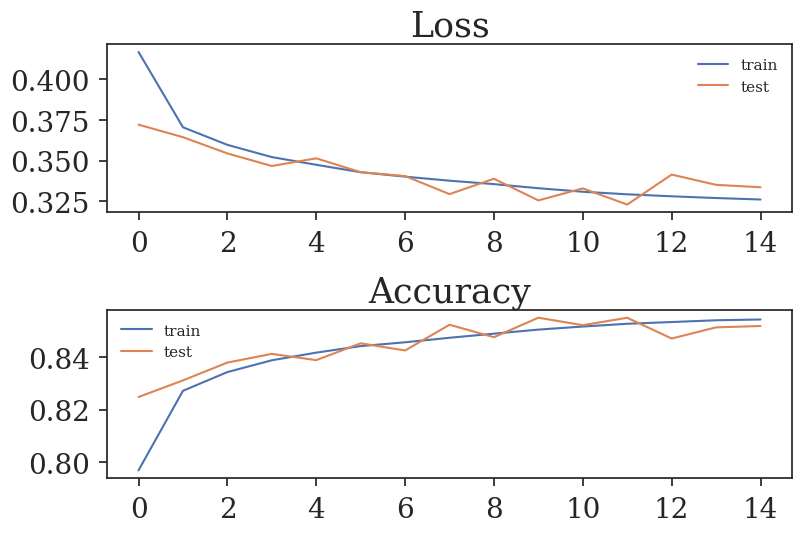

In [636]:
# fit model
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_sd, y_train, validation_data=(X_test_sd, y_test), epochs=100, verbose=1, batch_size=64, callbacks=[early_stopping_callback])
#batch_size=len(y_train)
# evaluate the model
_, train_acc = model.evaluate(X_train_sd, y_train, verbose=2)
_, test_acc = model.evaluate(X_test_sd, y_test, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss', fontsize=25)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy', fontsize=25)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
pyplot.tight_layout()
pyplot.savefig("Accuracy_Loss_with_environment.png",dpi=1200)
pyplot.show()

In [637]:
y_pred=model.predict(X_test_sd)
y_pred

71552/71552 ━━━━━━━━━━━━━━━━━━━━ 12s 169us/step


array([[6.66e-07],
       [8.17e-01],
       [6.01e-07],
       ...,
       [7.26e-27],
       [8.00e-01],
       [3.80e-01]], dtype=float32)

In [638]:
li=[]



for i in y_pred:
    if i>=0.5:
        li.append(1)
    else:
        li.append(0)

print("The count of 1s",li.count(1))
print("The count of 0s",li.count(0))

The count of 1s 1408885
The count of 0s 880752


              precision    recall  f1-score   support

           0       0.96      0.74      0.83   1144994
           1       0.79      0.97      0.87   1144643

    accuracy                           0.85   2289637
   macro avg       0.87      0.85      0.85   2289637
weighted avg       0.87      0.85      0.85   2289637



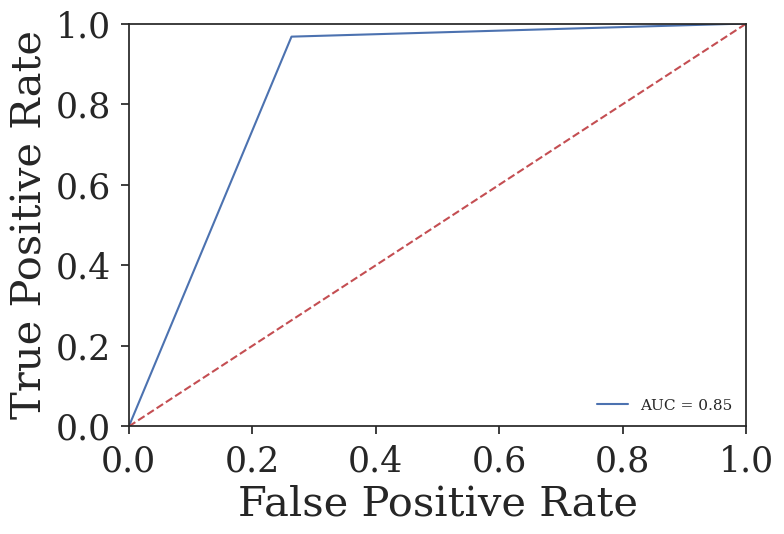

In [639]:
import matplotlib.pyplot as plt
y_pred=np.array(li)
y_test=np.array(y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
auc_graph= plt.figure()
#plt.title('Receiver Operating Characteristic_without_env', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=30)
plt.xlabel('False Positive Rate',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("ROC_CURVE_WITH18FEATURES_real",dpi=1200, bbox_inches="tight")
plt.tight_layout()
plt.show()

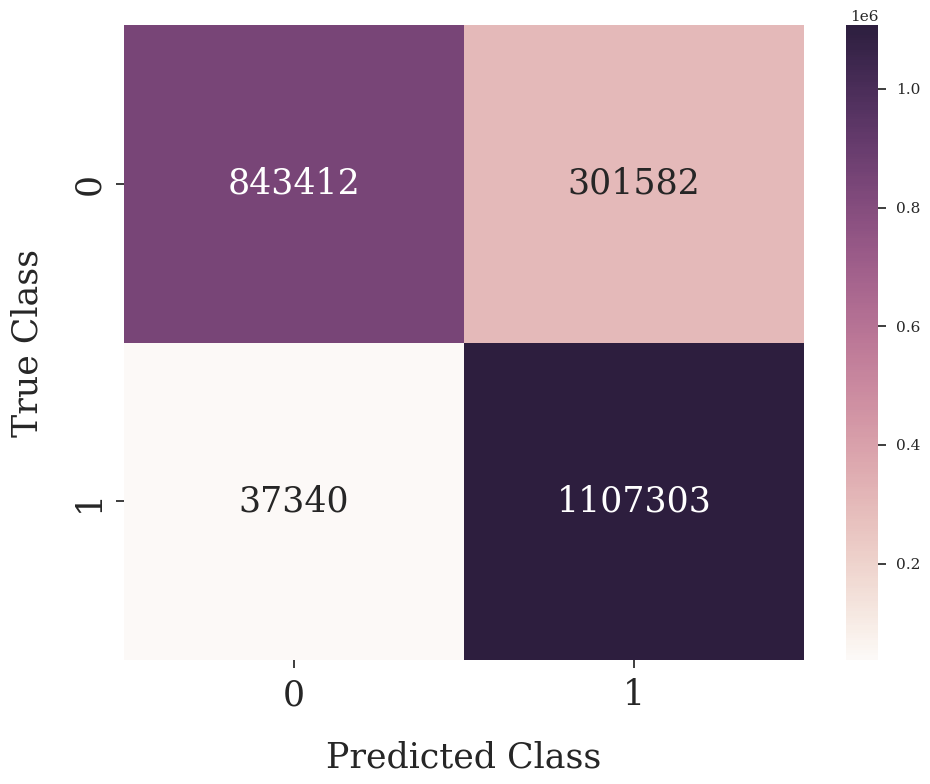

In [640]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 25}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=25, labelpad=20)
plt.ylabel("True Class", fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig("with_environment_CM.png",dpi=1200)
plt.show()

In [641]:
!pip3 install keras
import os
print(os.listdir())
model.save("Desktop/ANN_model_oversampling_28_02_2025_testing_7bestfeatures_18.keras")
model.save_weights("ANN_model_oversampling.weights.h5")

print(os.getcwd())

['confusion_matrix.png', 'Confusion_Matrix.jpg', 'Final_model2_script_Artificial_Neural_Network_code_cornea_27_06_2024_good_model_oversampling__updatedtrainingfile.ipynb', '.config', 'Music', 'Accuracy_Loss_without_environment.png', '.condarc', 'Final_model1_script_Artificial_Neural_Network_code_cornea_15_04_2024_good_model_oversampling__updatedtrainingfile-Copy1_no_environment.ipynb', 'Untitled1.ipynb', 'with_environment_CM.png', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', 'Untitled.ipynb', '.zshrc', 'with18bestfeatures', 'Final_model1_script_Artificial_Neural_Network_code_cornea_15_04_2024_good_model_oversampling__updatedtrainingfile-Copy1.ipynb', 'Pictures', '.zprofile', 'ANN_model_oversampling_15_04_2024_testing.keras', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'Confusion_Matrix-Copy1.jpg', 'Public', '.tcshrc', '.virtual_documents', 'Accuracy_Loss_with_environment.png', 'sklearn-env', '.anaconda', 'without_environment_CM.png', 'Movies

In [642]:
data_dir1="/content/gdrive/MyDrive/Colab Notebooks/updated_training_file/"
df1 = pd.read_csv(data_dir1 +"1A1M_test_df.csv", engine="python")

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/updated_training_file/1A1M_test_df.csv'

In [ ]:
df = pd.read_csv(data_dir1 + "1A1M_test_df.csv", engine= 'python')

df_x1 = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value", "ecc.m$value", "ecmi.m$value", "ecp.m$value", "ecp1.m$value", "ecp2.m$value", "ehcm.m$value", "ersa.m$value", "escm.m$value", "essp.m$value"]])


df_y1 = (df[["inf.m$value"]])

df_x1.shape, df_y1[df_y1["inf.m$value"] == 1].shape

In [ ]:
xtest_1a1m = np.array(df_x1)
ytest_1a1m = np.array(df_y1)
rsc_xtest_1a1m = scaler.transform(xtest_1a1m)
rsc_xtest_1a1m_sd = sdscaler.fit_transform(rsc_xtest_1a1m)
ytest_1a1m = ytest_1a1m.ravel()
ypred_1a1m = model.predict(rsc_xtest_1a1m_sd)
ypred_1a1m

In [ ]:
li1=[]

for i in ypred_1a1m:
  if i>=0.5:
    li1.append(1)
  else:
    li1.append(0)

print("The count of 1s",li1.count(1))
print("The count of 0s",li1.count(0))
y_pred=np.array(li1)
y_test=np.array(ytest_1a1m)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 16}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=20, labelpad=20)
plt.ylabel("True Class", fontsize=20, labelpad=20)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
auc_graph= plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
data_dir1="/content/gdrive/MyDrive/Colab Notebooks/training_files/"
df1 = pd.read_csv(data_dir1 +"4i48_test_df.csv", engine="python")

In [ ]:
df = pd.read_csv(data_dir1 + "4i48_test_df.csv", engine= 'python')

df_x1 = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value", "ecc.m$value", "ecmi.m$value", "ecp.m$value", "ecp1.m$value", "ecp2.m$value", "ehcm.m$value", "ersa.m$value", "escm.m$value", "essp.m$value"]])


df_y1 = (df[["inf.m$value"]])

df_x1.shape, df_y1[df_y1["inf.m$value"] == 1].shape

In [ ]:
xtest_4i48 = np.array(df_x1)
ytest_4i48 = np.array(df_y1)
rsc_xtest_4i48 = scaler.transform(xtest_4i48)
rsc_xtest_4i48_sd = sdscaler.fit_transform(rsc_xtest_4i48)
ytest_4i48 = ytest_4i48.ravel()
ypred_4i48 = model.predict(rsc_xtest_4i48_sd)
ypred_4i48

In [ ]:
li1=[]

for i in ypred_4i48:
  if i>=0.5:
    li1.append(1)
  else:
    li1.append(0)

print("The count of 1s",li1.count(1))
print("The count of 0s",li1.count(0))
y_pred=np.array(li1)
y_test=np.array(ytest_4i48)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 16}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=20, labelpad=20)
plt.ylabel("True Class", fontsize=20, labelpad=20)
plt.show()